In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
from highlight_text import htext
from matplotlib import cm
import matplotlib.patheffects as path_effects

%matplotlib inline

In [2]:
pwd

'/Users/ollinj01/Football Analytics/who-scored/Aouar-Partey/Partey'

In [3]:
df = pd.read_csv('./fbref/defence_1920.csv')
misc =  pd.read_csv('./misc_1920.csv')
poss =  pd.read_csv('./possession_1920.csv')
pd.set_option('display.max_columns', None)

In [4]:
# def drop_header(df):
#     my_df = df.copy()
#     my_df = my_df.droplevel(0, axis=1)
#     return(my_df)

In [5]:
# misc = drop_header(misc)

In [6]:
# misc.to_csv('misc_1920.csv', index=False)

In [7]:
def cleaner(df):
    all_columns = list(df.columns)
    unwanted_columns = {'Player','Comp','Pos'}
    index_columns = [ele for ele in all_columns if ele not in unwanted_columns]
    num_df = df.loc[:,index_columns].apply(pd.to_numeric, errors='coerce')
    num_df.fillna(0, inplace=True)
    master_df = pd.concat([df[['Player', 'Comp','Pos']], num_df], axis = 1)
    return master_df   

In [8]:
df=cleaner(df)

In [9]:
misc=cleaner(misc)

In [10]:
poss=cleaner(poss)

In [11]:
mask=((df['Pos'] != 'GK') | (df['Pos'] != 'DF')) & (df['90s'] > 11)
df = df.loc[mask]

In [12]:
mask=((misc['Pos'] != 'GK') | (misc['Pos'] != 'DF')) & (misc['90s'] > 11)
misc = misc.loc[mask]

In [13]:
mask=((poss['Pos'] != 'GK') | (poss['Pos'] != 'DF')) & (poss['90s'] > 11)
poss = poss.loc[mask]

In [14]:
df['Tkl_p90'] = df['Tkl']/df['90s']
df['Tkl+Int_p90'] = df['Tkl+Int']/df['90s']

In [15]:
misc['Recov_p90'] = misc['Recov']/misc['90s']
misc['Won_p90'] = misc['Won']/misc['90s']

In [16]:
poss['Carries_p90'] = poss['Carries']/poss['90s']
poss['Succ_Drib_p90'] = poss['Succ']/poss['90s']

In [17]:
# df.head()

In [18]:
# master_df = master_df.replace(0, np.nan)
# master_df

In [19]:
# Drop columns
df1 = df.drop(['Player', 'Nation','Pos', 'Squad', 'Comp', 'Age', 'Born', '90s'], axis=1)

In [20]:
# Drop columns
df2 = misc.drop(['Player', 'Nation','Pos', 'Squad', 'Comp', 'Age', 'Born', '90s'], axis=1)

In [21]:
# Drop columns
df3 = poss.drop(['Player', 'Nation','Pos', 'Squad', 'Comp', 'Age', 'Born', '90s'], axis=1)

In [22]:
#Normalize data
DFNom = df1.transform(lambda x: (x - x.min())/ (x.max() - x.min()))

In [23]:
#Normalize data
DFNom2 = df2.transform(lambda x: (x - x.min())/ (x.max() - x.min()))

In [24]:
#Normalize data
DFNom3 = df3.transform(lambda x: (x - x.min())/ (x.max() - x.min()))

In [25]:
master_df = pd.concat([df[['Player','Pos','Squad','Comp','Age']], DFNom], axis = 1)
master_df.head()

,Player,Pos,Squad,Comp,Age,Rk,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,Tkl%,Past,Press,Succ,%,Def 3rd.1,Mid 3rd.1,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err,Matches,Tkl_p90,Tkl+Int_p90
0,Patrick van Aanholt,DF,0.0,eng Premier League,28.0,0.000000,0.369565,0.359551,0.402439,0.296296,0.117647,0.392857,0.382979,0.407,0.326531,0.262279,0.243421,0.277,0.387805,0.137864,0.092269,0.558824,0.236364,0.333333,0.505747,0.547619,0.464115,0.203647,0.428571,NaN,0.381912,0.494058
1,Max Aarons,DF,0.0,eng Premier League,19.0,0.000366,0.463768,0.404494,0.487805,0.314815,0.411765,0.375000,0.319149,0.467,0.244898,0.476424,0.434211,0.272,0.685366,0.275728,0.154613,0.980392,0.545455,0.666667,0.804598,0.416667,0.473684,0.261398,0.000000,NaN,0.371429,0.390789
2,Yunis Abdelhamid,DF,0.0,fr Ligue 1,31.0,0.000732,0.442029,0.415730,0.524390,0.296296,0.117647,0.250000,0.198582,0.500,0.142857,0.293713,0.365132,0.371,0.460976,0.188350,0.032419,0.421569,0.345455,0.000000,0.275862,0.583333,0.526316,0.504559,0.142857,NaN,0.455166,0.558271
4,Mehdi Abeid,MF,0.0,fr Ligue 1,26.0,0.001465,0.434783,0.460674,0.292683,0.629630,0.117647,0.428571,0.439716,0.387,0.387755,0.409627,0.375000,0.273,0.295122,0.452427,0.157107,0.176471,0.054545,0.000000,0.172414,0.261905,0.392344,0.066869,0.000000,NaN,0.620580,0.576863
6,David Abraham,DF,0.0,de Bundesliga,33.0,0.002197,0.217391,0.247191,0.219512,0.185185,0.117647,0.285714,0.241135,0.471,0.183673,0.196464,0.246711,0.375,0.265854,0.151456,0.032419,0.303922,0.254545,0.333333,0.195402,0.273810,0.253589,0.264438,0.142857,NaN,0.333397,0.400616


In [26]:
master_df2 = pd.concat([misc[['Player','Pos','Squad','Comp','Age']], DFNom2], axis = 1)
master_df2.head()

,Player,Pos,Squad,Comp,Age,Rk,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost,Won%,Matches,Recov_p90,Won_p90
0,Patrick van Aanholt,DF,0.0,eng Premier League,28.0,0.000000,0.000000,0.0,0.0,0.098901,0.047904,0.045455,0.197309,0.389831,0.359551,0.0,0.0,0.5,0.442589,0.045113,0.058621,0.414,NaN,0.456104,0.047987
1,Max Aarons,DF,0.0,eng Premier League,19.0,0.000366,0.411765,0.0,0.0,0.318681,0.293413,0.068182,0.242152,0.338983,0.404494,0.2,0.0,0.0,0.521921,0.086466,0.144828,0.354,NaN,0.396341,0.071281
2,Yunis Abdelhamid,DF,0.0,fr Ligue 1,31.0,0.000732,0.000000,0.0,0.0,0.230769,0.119760,0.000000,0.004484,0.406780,0.415730,0.0,0.2,0.0,0.407098,0.323308,0.144828,0.672,NaN,0.413916,0.342680
4,Mehdi Abeid,MF,0.0,fr Ligue 1,26.0,0.001465,0.294118,0.0,0.0,0.604396,0.257485,0.022727,0.080717,0.288136,0.460674,0.0,0.2,0.0,0.340292,0.052632,0.065517,0.424,NaN,0.515217,0.077326
6,David Abraham,DF,0.0,de Bundesliga,33.0,0.002197,0.117647,0.5,0.0,0.153846,0.071856,0.000000,0.022422,0.271186,0.247191,0.0,0.0,0.0,0.402923,0.191729,0.110345,0.614,NaN,0.667971,0.302664


In [27]:
master_df3 = pd.concat([misc[['Player','Pos','Squad','Comp','Age']], DFNom3], axis = 1)
master_df3.head()

,Player,Pos,Squad,Comp,Age,Rk,Touches,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen,Live,Succ,Att,Succ%,#Pl,Megs,Carries,TotDist,PrgDist,Targ,Rec,Rec%,Miscon,Dispos,Matches,Carries_p90,Succ_Drib_p90
0,Patrick van Aanholt,DF,0.0,eng Premier League,28.0,0.000000,0.480532,0.065278,0.309809,0.423298,0.358008,0.160377,0.383531,0.097297,0.130435,0.500,0.092308,0.153846,0.390401,0.325653,0.275712,0.377985,0.358650,0.865646,0.165354,0.093023,NaN,0.337333,0.109527
1,Max Aarons,DF,0.0,eng Premier League,19.0,0.000366,0.571384,0.122917,0.473684,0.432886,0.399731,0.163522,0.499840,0.264865,0.340580,0.521,0.282051,0.153846,0.538533,0.570917,0.494023,0.507487,0.464135,0.811224,0.307087,0.279070,NaN,0.348010,0.231072
2,Yunis Abdelhamid,DF,0.0,fr Ligue 1,31.0,0.000732,0.485785,0.177083,0.669856,0.383988,0.041050,0.084906,0.487344,0.113514,0.094203,0.808,0.107692,0.000000,0.483156,0.455069,0.387287,0.453662,0.460759,0.959184,0.094488,0.046512,NaN,0.425679,0.127326
4,Mehdi Abeid,MF,0.0,fr Ligue 1,26.0,0.001465,0.275649,0.014583,0.119617,0.361457,0.190444,0.062893,0.265940,0.064865,0.079710,0.545,0.061538,0.000000,0.289802,0.239055,0.179507,0.286928,0.259494,0.811224,0.110236,0.151163,NaN,0.373302,0.100852
6,David Abraham,DF,0.0,de Bundesliga,33.0,0.002197,0.243511,0.074306,0.281100,0.281879,0.058546,0.034591,0.243512,0.048649,0.039855,0.818,0.056410,0.076923,0.234425,0.227727,0.201898,0.199919,0.200422,0.947279,0.047244,0.011628,NaN,0.329444,0.081272


In [28]:
mask2=(master_df['Player']=='Thomas Partey')
partey=master_df[mask2]
partey

,Player,Pos,Squad,Comp,Age,Rk,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,Tkl%,Past,Press,Succ,%,Def 3rd.1,Mid 3rd.1,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err,Matches,Tkl_p90,Tkl+Int_p90
1974,Thomas Partey,MF,0.0,es La Liga,26.0,0.69535,0.471014,0.505618,0.414634,0.518519,0.176471,0.464286,0.460993,0.4,0.397959,0.437132,0.453947,0.31,0.436585,0.425243,0.117207,0.54902,0.163636,0.0,0.54023,0.619048,0.559809,0.164134,0.285714,NaN,0.479871,0.587502


In [29]:
mask=(master_df2['Player']=='Thomas Partey')
partey_misc=master_df2[mask]
partey_misc

,Player,Pos,Squad,Comp,Age,Rk,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost,Won%,Matches,Recov_p90,Won_p90
1974,Thomas Partey,MF,0.0,es La Liga,26.0,0.69535,0.764706,0.0,0.0,0.527473,0.191617,0.0,0.03139,0.474576,0.505618,0.0,0.2,0.0,0.736952,0.221805,0.106897,0.656,NaN,0.777302,0.232602


In [30]:
mask=(master_df3['Player']=='Thomas Partey')
partey_poss=master_df3[mask]
partey_poss

,Player,Pos,Squad,Comp,Age,Rk,Touches,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen,Live,Succ,Att,Succ%,#Pl,Megs,Carries,TotDist,PrgDist,Targ,Rec,Rec%,Miscon,Dispos,Matches,Carries_p90,Succ_Drib_p90
1974,Thomas Partey,MF,0.0,es La Liga,26.0,0.69535,0.527194,0.059722,0.263756,0.642857,0.204576,0.04717,0.534124,0.254054,0.202899,0.839,0.246154,0.153846,0.565759,0.400794,0.324953,0.496155,0.49789,0.942177,0.15748,0.087209,NaN,0.499237,0.281946


In [31]:
mask3=(master_df['Player']=='Lucas Torreira')
torreira=master_df[mask3]
torreira

,Player,Pos,Squad,Comp,Age,Rk,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,Tkl%,Past,Press,Succ,%,Def 3rd.1,Mid 3rd.1,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err,Matches,Tkl_p90,Tkl+Int_p90
2607,Lucas Torreira,MF,0.0,eng Premier League,23.0,0.917979,0.268116,0.269663,0.207317,0.296296,0.235294,0.214286,0.241135,0.353,0.22449,0.395874,0.335526,0.253,0.380488,0.38835,0.117207,0.284314,0.163636,0.0,0.229885,0.369048,0.325359,0.091185,0.142857,NaN,0.46014,0.575188


In [32]:
mask3=(master_df2['Player']=='Lucas Torreira')
torreira_misc=master_df2[mask3]
torreira_misc

,Player,Pos,Squad,Comp,Age,Rk,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost,Won%,Matches,Recov_p90,Won_p90
2607,Lucas Torreira,MF,0.0,eng Premier League,23.0,0.917979,0.411765,0.0,0.0,0.263736,0.257485,0.022727,0.022422,0.40678,0.269663,0.0,0.0,0.0,0.384134,0.033835,0.062069,0.333,NaN,0.726319,0.05977


In [33]:
mask3=(master_df3['Player']=='Lucas Torreira')
torreira_poss=master_df3[mask3]
torreira_poss

,Player,Pos,Squad,Comp,Age,Rk,Touches,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen,Live,Succ,Att,Succ%,#Pl,Megs,Carries,TotDist,PrgDist,Targ,Rec,Rec%,Miscon,Dispos,Matches,Carries_p90,Succ_Drib_p90
2607,Lucas Torreira,MF,0.0,eng Premier League,23.0,0.917979,0.249382,0.039583,0.176435,0.317833,0.125841,0.097484,0.256328,0.07027,0.057971,0.813,0.066667,0.076923,0.264421,0.182156,0.126091,0.25172,0.238397,0.870748,0.086614,0.093023,NaN,0.430452,0.131368


In [34]:
mask4=(master_df['Player']=='Granit Xhaka')
xhaka=master_df[mask4]
xhaka

,Player,Pos,Squad,Comp,Age,Rk,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,Tkl%,Past,Press,Succ,%,Def 3rd.1,Mid 3rd.1,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err,Matches,Tkl_p90,Tkl+Int_p90
2786,Granit Xhaka,MF,0.0,eng Premier League,26.0,0.980959,0.333333,0.303371,0.329268,0.277778,0.235294,0.321429,0.390071,0.327,0.377551,0.425344,0.414474,0.291,0.382927,0.450485,0.109726,0.539216,0.309091,0.333333,0.436782,0.25,0.320574,0.258359,0.0,NaN,0.334868,0.331744


In [35]:
mask4=(master_df2['Player']=='Granit Xhaka')
xhaka_misc=master_df2[mask4]
xhaka_misc

,Player,Pos,Squad,Comp,Age,Rk,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost,Won%,Matches,Recov_p90,Won_p90
2786,Granit Xhaka,MF,0.0,eng Premier League,26.0,0.980959,0.588235,0.0,0.0,0.615385,0.191617,0.0,0.058296,0.186441,0.303371,0.0,0.2,0.0,0.601253,0.191729,0.17931,0.495,NaN,0.615096,0.198261


In [36]:
mask4=(master_df3['Player']=='Granit Xhaka')
xhaka_poss=master_df3[mask4]
xhaka_poss

,Player,Pos,Squad,Comp,Age,Rk,Touches,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen,Live,Succ,Att,Succ%,#Pl,Megs,Carries,TotDist,PrgDist,Targ,Rec,Rec%,Miscon,Dispos,Matches,Carries_p90,Succ_Drib_p90
2786,Granit Xhaka,MF,0.0,eng Premier League,26.0,0.980959,0.575093,0.086806,0.373206,0.633269,0.211978,0.056604,0.587632,0.145946,0.115942,0.844,0.138462,0.153846,0.634056,0.439772,0.321442,0.606232,0.597046,0.913265,0.07874,0.069767,NaN,0.555337,0.159712


In [37]:
mask5=(master_df['Player']=='Dani Ceballos')
ceballos=master_df[mask5]
ceballos

,Player,Pos,Squad,Comp,Age,Rk,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,Tkl%,Past,Press,Succ,%,Def 3rd.1,Mid 3rd.1,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err,Matches,Tkl_p90,Tkl+Int_p90
496,Dani Ceballos,MF,0.0,eng Premier League,22.0,0.174661,0.355072,0.314607,0.304878,0.314815,0.411765,0.303571,0.439716,0.274,0.459184,0.437132,0.394737,0.27,0.480488,0.370874,0.142145,0.284314,0.072727,0.0,0.287356,0.357143,0.37799,0.066869,0.142857,NaN,0.544548,0.597144


In [38]:
mask5=(master_df2['Player']=='Dani Ceballos')
ceballos_misc=master_df2[mask5]
ceballos_misc

,Player,Pos,Squad,Comp,Age,Rk,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost,Won%,Matches,Recov_p90,Won_p90
496,Dani Ceballos,MF,0.0,eng Premier League,22.0,0.174661,0.058824,0.0,0.0,0.208791,0.209581,0.0,0.098655,0.338983,0.314607,0.0,0.0,0.0,0.331942,0.041353,0.075862,0.333,NaN,0.548427,0.06528


In [39]:
mask5=(master_df3['Player']=='Dani Ceballos')
ceballos_poss=master_df3[mask5]
ceballos_poss

,Player,Pos,Squad,Comp,Age,Rk,Touches,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen,Live,Succ,Att,Succ%,#Pl,Megs,Carries,TotDist,PrgDist,Targ,Rec,Rec%,Miscon,Dispos,Matches,Carries_p90,Succ_Drib_p90
496,Dani Ceballos,MF,0.0,eng Premier League,22.0,0.174661,0.3733,0.038194,0.200359,0.422819,0.271198,0.066038,0.363986,0.156757,0.148551,0.707,0.158974,0.307692,0.428703,0.440732,0.358918,0.400243,0.392405,0.909864,0.094488,0.145349,NaN,0.610044,0.261875


In [40]:
mask6=(master_df['Player']=='Mattéo Guendouzi')
guendouzi=master_df[mask6]
guendouzi

,Player,Pos,Squad,Comp,Age,Rk,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,Tkl%,Past,Press,Succ,%,Def 3rd.1,Mid 3rd.1,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err,Matches,Tkl_p90,Tkl+Int_p90
1062,Mattéo Guendouzi,MF,0.0,eng Premier League,20.0,0.374222,0.173913,0.146067,0.134146,0.166667,0.235294,0.178571,0.255319,0.278,0.265306,0.37721,0.358553,0.284,0.385366,0.339806,0.127182,0.392157,0.127273,0.0,0.37931,0.357143,0.258373,0.145897,0.0,NaN,0.258468,0.395551


In [41]:
mask6=(master_df2['Player']=='Mattéo Guendouzi')
guendouzi_misc=master_df2[mask6]
guendouzi_misc

,Player,Pos,Squad,Comp,Age,Rk,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost,Won%,Matches,Recov_p90,Won_p90
1062,Mattéo Guendouzi,MF,0.0,eng Premier League,20.0,0.374222,0.352941,0.0,0.0,0.186813,0.293413,0.0,0.026906,0.372881,0.146067,0.2,0.0,0.0,0.336117,0.041353,0.062069,0.379,NaN,0.534581,0.063261


In [42]:
mask6=(master_df3['Player']=='Mattéo Guendouzi')
guendouzi_poss=master_df3[mask6]
guendouzi_poss

,Player,Pos,Squad,Comp,Age,Rk,Touches,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen,Live,Succ,Att,Succ%,#Pl,Megs,Carries,TotDist,PrgDist,Targ,Rec,Rec%,Miscon,Dispos,Matches,Carries_p90,Succ_Drib_p90
1062,Mattéo Guendouzi,MF,0.0,eng Premier League,20.0,0.374222,0.331582,0.052083,0.211124,0.411314,0.178331,0.066038,0.343159,0.156757,0.152174,0.69,0.148718,0.153846,0.409783,0.425435,0.347913,0.367463,0.358228,0.903061,0.070866,0.162791,NaN,0.561238,0.253776


In [43]:
len(master_df)

1463

In [44]:
mask = (master_df['Tkl+Int_p90'] > 0.03)
master_df1 = master_df.loc[mask]
len(master_df1)

1351

In [45]:
mask = ((master_df2['Won_p90'] < 0.7) & (master_df2['Won_p90'] > 0.01))
header = master_df2.loc[mask]
len(header)

1337

In [46]:
mask = ((master_df3['Succ_Drib_p90'] < 0.65) & (master_df3['Succ_Drib_p90'] > 0.02))
drib = master_df3.loc[mask]
len(drib)

1281

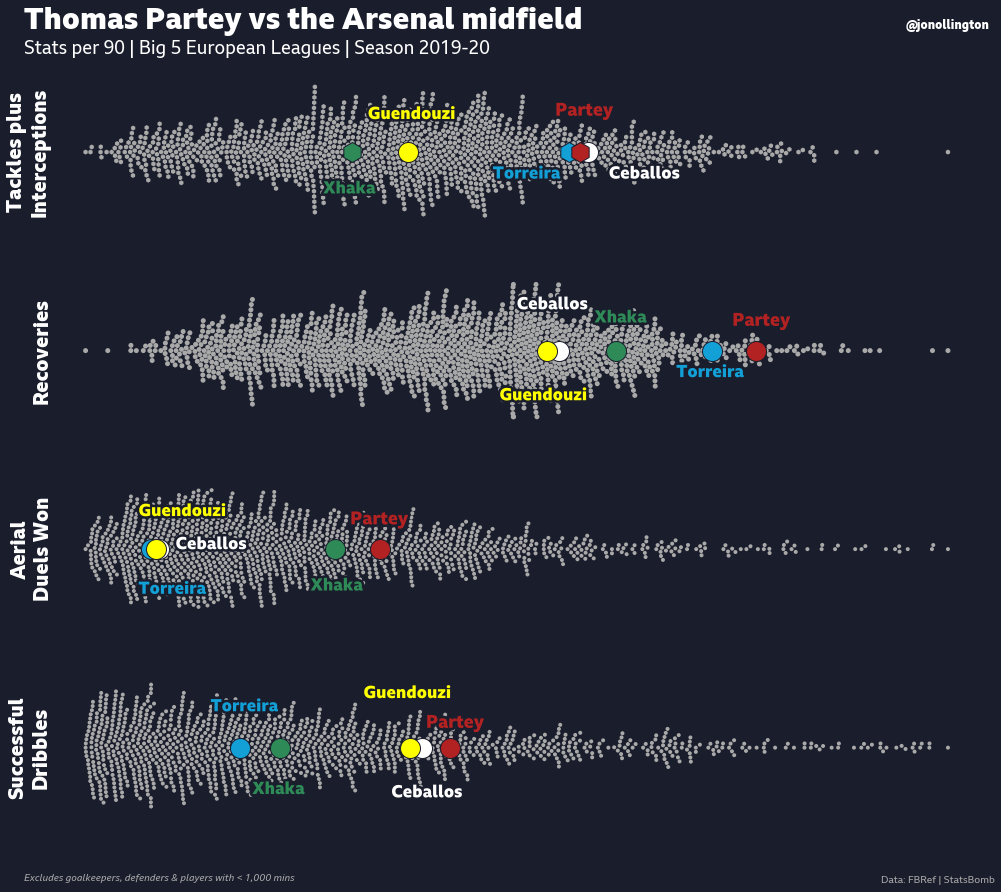

In [54]:
fig, axarr = plt.subplots(4,1, figsize=(17,14))

plt.rcParams['font.family'] = 'BBC Reith Sans'
csfont = {'fontname':'BBC Reith Sans'}
hfont = {'fontname':'BBC Reith Sans'}

#set figure background colour
fig.set_facecolor('#1a1d2c')

fig.text(0.11,0.92,"Thomas Partey vs the Arsenal midfield",color="White",fontsize=30, **csfont, fontweight='bold')
fig.text(0.83,0.92,"@jonollington",color="White",fontsize=12, **csfont, fontweight='bold')
fig.text(0.11,0.895,"Stats per 90 | Big 5 European Leagues | Season 2019-20",color="White",fontsize=18, **csfont)
fig.text(0.11,0.075,"Excludes goalkeepers, defenders & players with < 1,000 mins",color="darkgrey",fontsize=10, **csfont, fontstyle="italic")
fig.text(0.81,0.073,"Data: FBRef | StatsBomb",color="darkgrey",fontsize=10, **csfont)

axarr[0].patch.set_facecolor('#1a1d2c')
plt.sca(axarr[0])
sns.swarmplot(x=master_df1["Tkl+Int_p90"],color='darkgrey',zorder=1,alpha=1, size=5,marker="h")
sns.swarmplot(x=partey["Tkl+Int_p90"],color='firebrick',edgecolor='#1a1d2c',linewidth=1,zorder=2, size=20,marker="h")
sns.swarmplot(x=torreira["Tkl+Int_p90"],color='#12A0D7',edgecolor='#1a1d2c',linewidth=1,zorder=1, size=20,marker="h")
sns.swarmplot(x=xhaka["Tkl+Int_p90"],color='seagreen',edgecolor='#1a1d2c',linewidth=1,zorder=1, size=20,marker="h")
sns.swarmplot(x=ceballos["Tkl+Int_p90"],color='white',edgecolor='#1a1d2c',linewidth=1,zorder=1, size=20)
sns.swarmplot(x=guendouzi["Tkl+Int_p90"],color='yellow',edgecolor='#1a1d2c',linewidth=1,zorder=1, size=20)
plt.axis('off')

n1=axarr[0].text(0.56, -0.22, 'Partey', color='firebrick', fontsize=18,fontweight='bold',**csfont)
n2=axarr[0].text(0.49, 0.16, 'Torreira', color='#12A0D7', fontsize=17,fontweight='bold',**csfont)
n3=axarr[0].text(0.3, 0.25, 'Xhaka', color='seagreen', fontsize=17,fontweight='bold',**csfont)
n4=axarr[0].text(0.62, 0.16, 'Ceballos', color='white', fontsize=17,fontweight='bold',**csfont)
n=axarr[0].text(0.35, -0.2, 'Guendouzi', color='yellow', fontsize=17,fontweight='bold',**csfont)

n1.set_path_effects([path_effects.withStroke(linewidth=5,foreground='#1a1d2c')])
n2.set_path_effects([path_effects.withStroke(linewidth=5,foreground='#1a1d2c')])
n3.set_path_effects([path_effects.withStroke(linewidth=5,foreground='#1a1d2c')])
n4.set_path_effects([path_effects.withStroke(linewidth=5,foreground='#1a1d2c')])
n.set_path_effects([path_effects.withStroke(linewidth=5,foreground='#1a1d2c')])

axarr[0].text(-0.03, 0, "Tackles plus\nInterceptions", rotation=90, ha='center',va='center', color="white", **csfont, fontsize=20, fontweight="bold")

axarr[1].patch.set_facecolor('#1a1d2c')
plt.sca(axarr[1])
sns.swarmplot(x=master_df2["Recov_p90"],color='darkgrey',zorder=1,alpha=1, size=5)
sns.swarmplot(x=partey_misc["Recov_p90"],color='firebrick',edgecolor='#1a1d2c',linewidth=1,zorder=2, size=20)
sns.swarmplot(x=torreira_misc["Recov_p90"],color='#12A0D7',edgecolor='#1a1d2c',linewidth=1,zorder=1, size=20)
sns.swarmplot(x=xhaka_misc["Recov_p90"],color='seagreen',edgecolor='#1a1d2c',linewidth=1,zorder=1, size=20)
sns.swarmplot(x=ceballos_misc["Recov_p90"],color='white',edgecolor='#1a1d2c',linewidth=1,zorder=1, size=20)
sns.swarmplot(x=guendouzi_misc["Recov_p90"],color='yellow',edgecolor='#1a1d2c',linewidth=1,zorder=1, size=20)
plt.axis('off')

n=axarr[1].text(0.75, -0.15, 'Partey', color='firebrick', fontsize=18,fontweight='bold',**csfont)
n1=axarr[1].text(0.685, 0.16, 'Torreira', color='#12A0D7', fontsize=17,fontweight='bold',**csfont)
n2=axarr[1].text(0.59, -0.17, 'Xhaka', color='seagreen', fontsize=17,fontweight='bold',**csfont)
n3=axarr[1].text(0.5, -0.25, 'Ceballos', color='white', fontsize=17,fontweight='bold',**csfont)
n4=axarr[1].text(0.48, 0.3, 'Guendouzi', color='yellow', fontsize=17,fontweight='bold',**csfont)

n1.set_path_effects([path_effects.withStroke(linewidth=5,foreground='#1a1d2c')])
n2.set_path_effects([path_effects.withStroke(linewidth=5,foreground='#1a1d2c')])
n3.set_path_effects([path_effects.withStroke(linewidth=5,foreground='#1a1d2c')])
n4.set_path_effects([path_effects.withStroke(linewidth=5,foreground='#1a1d2c')])
n.set_path_effects([path_effects.withStroke(linewidth=5,foreground='#1a1d2c')])


axarr[1].text(-0.05, 0, "Recoveries", rotation=90, ha='center',va='center', color="white", **csfont, fontsize=20, fontweight="bold")

axarr[2].patch.set_facecolor('#1a1d2c')
plt.sca(axarr[2])
sns.swarmplot(x=header["Won_p90"],color='darkgrey',zorder=1,alpha=1, size=4)
sns.swarmplot(x=partey_misc["Won_p90"],color='firebrick',edgecolor='#1a1d2c',linewidth=1,zorder=2, size=20)
sns.swarmplot(x=torreira_misc["Won_p90"],color='#12A0D7',edgecolor='#1a1d2c',linewidth=1,zorder=1, size=20)
sns.swarmplot(x=xhaka_misc["Won_p90"],color='seagreen',edgecolor='#1a1d2c',linewidth=1,zorder=1, size=20)
sns.swarmplot(x=ceballos_misc["Won_p90"],color='white',edgecolor='#1a1d2c',linewidth=1,zorder=1, size=20)
sns.swarmplot(x=guendouzi_misc["Won_p90"],color='yellow',edgecolor='#1a1d2c',linewidth=1,zorder=1, size=20)
plt.axis('off')

axarr[2].text(-0.03, 0, "Aerial\nDuels Won", rotation=90, ha='center',va='center', color="white", **csfont, fontsize=20, fontweight="bold")
n1=axarr[2].text(0.21, -0.15, 'Partey', color='firebrick', fontsize=18,fontweight='bold',**csfont)
n2=axarr[2].text(0.05, 0.27, 'Torreira', color='#12A0D7', fontsize=17,fontweight='bold',**csfont)
n3=axarr[2].text(0.18, 0.25, 'Xhaka', color='seagreen', fontsize=17,fontweight='bold',**csfont)
n4=axarr[2].text(0.078, 0, 'Ceballos', color='white', fontsize=17,fontweight='bold',**csfont)
n=axarr[2].text(0.05, -0.2, 'Guendouzi', color='yellow', fontsize=17,fontweight='bold',**csfont)

n1.set_path_effects([path_effects.withStroke(linewidth=5,foreground='#1a1d2c')])
n2.set_path_effects([path_effects.withStroke(linewidth=5,foreground='#1a1d2c')])
n3.set_path_effects([path_effects.withStroke(linewidth=5,foreground='#1a1d2c')])
n4.set_path_effects([path_effects.withStroke(linewidth=5,foreground='#1a1d2c')])
n.set_path_effects([path_effects.withStroke(linewidth=5,foreground='#1a1d2c')])

axarr[3].patch.set_facecolor('#1a1d2c')
plt.sca(axarr[3])
sns.swarmplot(x=drib["Succ_Drib_p90"],color='darkgrey',zorder=1,alpha=1, size=4)
sns.swarmplot(x=partey_poss["Succ_Drib_p90"],color='firebrick',edgecolor='#1a1d2c',linewidth=1,zorder=2, size=20)
sns.swarmplot(x=torreira_poss["Succ_Drib_p90"],color='#12A0D7',edgecolor='#1a1d2c',linewidth=1,zorder=1, size=20)
sns.swarmplot(x=xhaka_poss["Succ_Drib_p90"],color='seagreen',edgecolor='#1a1d2c',linewidth=1,zorder=1, size=20)
sns.swarmplot(x=ceballos_poss["Succ_Drib_p90"],color='white',edgecolor='#1a1d2c',linewidth=1,zorder=1, size=20)
sns.swarmplot(x=guendouzi_poss["Succ_Drib_p90"],color='yellow',edgecolor='#1a1d2c',linewidth=1,zorder=1, size=20)
plt.axis('off')

axarr[3].text(-0.02, 0, "Successful\nDribbles", rotation=90, ha='center',va='center', color="white", **csfont, fontsize=20, fontweight="bold")
n1=axarr[3].text(0.265, -0.12, 'Partey', color='firebrick', fontsize=18,fontweight='bold',**csfont)
n2=axarr[3].text(0.11, -0.22, 'Torreira', color='#12A0D7', fontsize=17,fontweight='bold',**csfont)
n3=axarr[3].text(0.14, 0.28, 'Xhaka', color='seagreen', fontsize=17,fontweight='bold',**csfont)
n=axarr[3].text(0.24, 0.3, 'Ceballos', color='white', fontsize=17,fontweight='bold',**csfont)
n4=axarr[3].text(0.22, -0.3, 'Guendouzi', color='yellow', fontsize=17,fontweight='bold',**csfont)

n1.set_path_effects([path_effects.withStroke(linewidth=5,foreground='#1a1d2c')])
n2.set_path_effects([path_effects.withStroke(linewidth=5,foreground='#1a1d2c')])
n3.set_path_effects([path_effects.withStroke(linewidth=5,foreground='#1a1d2c')])
n4.set_path_effects([path_effects.withStroke(linewidth=5,foreground='#1a1d2c')])
n.set_path_effects([path_effects.withStroke(linewidth=5,foreground='#1a1d2c')])



plt.rcParams['savefig.facecolor']='#1a1d2c'
plt.savefig("beeswarm", dip=700, bbox_inches='tight');

In [55]:
from beeswarm import *
import numpy as np

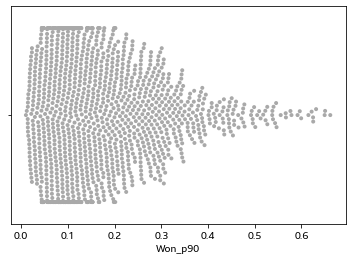

In [59]:
sns.swarmplot(x=header["Won_p90"],color='darkgrey',zorder=1,alpha=1, size=4);

In [68]:
import itertools
import math
import matplotlib.pyplot
import numpy
import pandas
import sys

In [74]:
def beeswarm(values, positions=None, method="swarm",
             ax=None, s=20, col="black", xlim=None, ylim=None,
             labels=None, labelrotation="vertical", **kwargs):
    """
    beeswarm(values, positions=None, method="swarm",
         ax=None, s=20, col="black", xlim=None, ylim=None,
         labels=None)
     Inputs:
         * values: an array of a sequence of vectors
         * positions: sets the horizontal positions of the swarms.
            Ticks and labels are set to match the positions.
            If none, set positions to range(len(values))
            Default: None
         * method: how to jitter the x coordinates. Choose from
            "swarm", "hex", "center", "square"
            Default: swarm
         * ax: use this axis for plotting. If none supplied, make a new one
            Default: None
         * s: size of points in points^2 (assuming 72 points/inch).
            Defautt: 20
         * col: color of points. Can be:
            - a single string: color all points that color
            - a vector of strings length len(values): gives color for each group
            - a vector of strings length sum([len(values[i]) for i in range(len(values))])
                 gives color for each point
            - a vector of strings any other length: cycle through the list of colors.
                 (really pretty if not useful)
            Default: "black"
            Note, colors can also be rgb tubples instead of strings.
         * xlim: tuple giving (xmin, xmax). If not specified, either get
             from the supplied ax or recalculate
         * ylim: tuple giving (ymin, ymax). If not specified, eiterh get
             from the supplied as or recalculate
         * labels: list of labels for each group.
             Default: range(len(values))
         * labelrotation: rotation of x label.
             Default: "vertical"
     Returns:
         * bs: pandas.DataFrame with columns: xorig, yorig, xnew, ynew, color
         * ax: the axis used for plotting
    """
    # Check things before we go on
    if method not in ["swarm", "hex", "center", "square"]:
        sys.stderr.write("ERROR: Invalid method.\n")
        return
    if len(values) == 0: return None
    if not hasattr(values[0], "__len__"): values = [values]
    if positions is None:
        positions = range(len(values))
    else:
        if len(positions) != len(values):
            sys.stderr.write("ERROR: number of positions must match number of groups\n")
            return None

    yvals = list(itertools.chain.from_iterable(values))
    xvals = list(itertools.chain.from_iterable([[positions[i]]*len(values[i]) for i in range(len(values))]))

    # Get color vector
    if type(col) == str:
        colors = [[col]*len(values[i]) for i in range(len(values))]
    elif type(col) == list:
        if len(col) == len(positions):
            colors = []
            for i in range(len(col)):
                colors.append([col[i]]*len(values[i]))
        elif len(col) == len(yvals):
            colors = []
            sofar = 0
            for i in range(len(values)):
                colors.append(col[sofar:(sofar+len(values[i]))])
                sofar = sofar + len(values[i])
        else:
            cx = col*(len(yvals)/len(col)) # hope for the best
            if len(cx) < len(yvals):
                cx.extend(col[0:(len(yvals)-len(cx))])
            colors = []
            sofar = 0
            for i in range(len(values)):
                colors.append(cx[sofar:(sofar+len(values[i]))])
                sofar = sofar + len(values[i])
    else:
        sys.stderr.write("ERROR: Invalid argument for col\n")
        return

    # Get axis limits
    if ax is None:
        fig = matplotlib.pyplot.figure()
        ax = fig.add_subplot(111)
    if xlim is not None:
        ax.set_xlim(left=xlim[0], right=xlim[1])
    else:
        xx = max(positions) - min(positions) + 1
        xmin = min(positions)-0.1*xx
        xmax = max(positions)+0.1*xx
        ax.set_xlim(left=xmin, right=xmax)
    if ylim is not None:
        ax.set_ylim(bottom=ylim[0], top=ylim[1])
    else:
        yy = max(yvals) - min(yvals)
        ymin = min(yvals)-.05*yy
        ymax = max(yvals)+0.05*yy
        ax.set_ylim(bottom=ymin, top=ymax)

    # Determine dot size
    figw, figh = ax.get_figure().get_size_inches()
    w = (ax.get_position().xmax-ax.get_position().xmin)*figw
    h = (ax.get_position().ymax-ax.get_position().ymin)*figh
    xran = ax.get_xlim()[1]-ax.get_xlim()[0]
    yran = ax.get_ylim()[1]-ax.get_ylim()[0]
    xsize=math.sqrt(s)*1.0/72*xran*1.0/(w*0.8)
    ysize=math.sqrt(s)*1.0/72*yran*1.0/(h*0.8)

    # Get new arrangements
    if method == "swarm":
        bs = _beeswarm(positions, values, xsize=xsize, ysize=ysize, method="swarm", colors=colors)
    else:
        bs = _beeswarm(positions, values, ylim=ax.get_ylim(), xsize=xsize, ysize=ysize, method=method, colors=colors)
    # plot
    ax.scatter(bs["xnew"], bs["ynew"], c=list(bs["color"]), **kwargs)
    ax.set_xticks(positions)
    if labels is not None:
        ax.set_xticklabels(labels, rotation=labelrotation)
    return bs, ax

def unsplit(x,f):
    """
    same as R's unsplit function
    Read of the values specified in f from x to a vector
    Inputs:
      x: dictionary of value->[items]
      f: vector specifying values to be read off to the vector
    """
    y = pandas.DataFrame({"y":[None]*len(f)})
    f = pandas.Series(f)
    for item in set(f):
        y.ix[f==item,"y"] = x[item]
    return y["y"]

def grid(x, ylim, xsize=0, ysize=0, method="hex", colors="black"):
    """
    Implement the non-swarm arrangement methods
    """
    size_d = ysize
    if method == "hex": size_d = size_d*math.sqrt(3)/2
    size_g = xsize
    breaks = numpy.arange(ylim[0], ylim[1]+size_d, size_d)
    mids = (pandas.Series(breaks[:-1]) + pandas.Series(breaks[1:]))*1.0/2
    d_index = pandas.Series(pandas.cut(pandas.Series(x), bins=breaks, labels=False))
    d_pos = d_index.apply(lambda x: mids[x])
    v_s = {}
    for item in set(d_index):
        odd_row = (item%2)==1
        vals = range(list(d_index).count(item))
        if method == "center":
            v_s[item] = list(map(lambda a: a - numpy.mean(vals), vals))
        elif method == "square":
            v_s[item] = list(map(lambda a: a - math.floor(numpy.mean(vals)), vals))
        elif method == "hex":
            if odd_row:
                v_s[item] = list(map(lambda a: a - math.floor(numpy.mean(vals)) - 0.25, vals))
            else:
                v_s[item] = list(map(lambda a: a - math.ceil(numpy.mean(vals)) + 0.25, vals))
        else:
            sys.stderr.write("ERROR: this block should never execute.\n")
            return
    x_index = unsplit(v_s, d_index)
    if type(colors) == str: colors = [colors]*len(x_index)
    return x_index.apply(lambda x: x*size_g), d_pos, colors

def swarm(x, xsize=0, ysize=0, colors="black"):
    """
    Implement the swarm arrangement method
    """
    gsize = xsize
    dsize = ysize
    out = pandas.DataFrame({"x": [item*1.0/dsize for item in x], "y": [0]*len(x), "color": colors, "order": range(len(x))})
    out.sort_index(by='x', inplace=True)
    if out.shape[0] > 1:
        for i in range(1, out.shape[0]):
            xi = out["x"].values[i]
            yi = out["y"].values[i]
            pre =  out[0:i] # previous points
            wh = (abs(xi-pre["x"]) < 1) # which are potentially overlapping
            if any(wh):
                pre = pre[wh]
                poty_off = pre["x"].apply(lambda x: math.sqrt(1-(xi-x)**2)) # potential y offset
                poty = pandas.Series([0] + (pre["y"] + poty_off).tolist() + (pre["y"]-poty_off).tolist()) # potential y values
                poty_bad = []
                for y in poty:
                    dists = (xi-pre["x"])**2 + (y-pre["y"])**2
                    if any([item < 0.999 for item in dists]): poty_bad.append(True)
                    else: poty_bad.append(False)
                poty[poty_bad] = numpy.infty
                abs_poty = [abs(item) for item in poty]
                newoffset = poty[abs_poty.index(min(abs_poty))]
                out.loc[i,"y"] = newoffset
            else:
                out.loc[i,"y"] = 0
    out.ix[numpy.isnan(out["x"]), "y"] = numpy.nan
    # Sort to maintain original order
    out.sort_index(by="order", inplace=True)
    return out["y"]*gsize, out["color"]

def _beeswarm(positions, values, xsize=0, ysize=0, ylim=None, method="swarm", colors="black"):
    """
    Call the appropriate arrangement method
    """
    xnew = []
    ynew = []
    xorig = []
    yorig = []
    newcolors = []
    # group y by X
    for i in range(len(positions)):
        xval = positions[i]
        ys = values[i]
        cs = colors[i]
        if method == "swarm":
            g_offset, ncs = swarm(ys, xsize=xsize, ysize=ysize, colors=cs)
            ynew.extend(ys)
        else:
            g_offset, new_values, ncs = grid(ys, xsize=xsize, ysize=ysize, ylim=ylim, method=method, colors=cs)
            ynew.extend(new_values)
        xnew.extend([xval+item for item in g_offset])
        yorig.extend(ys)
        xorig.extend([xval]*len(ys))
        newcolors.extend(ncs)
    out = pandas.DataFrame({"xnew":xnew, "yorig": yorig, "xorig":xorig, "ynew": ynew, "color": newcolors})
    return out


TypeError: sort_index() got an unexpected keyword argument 'by'

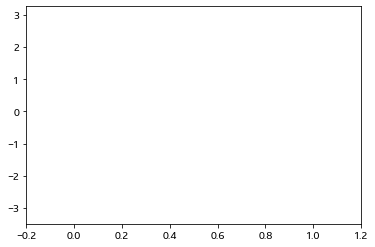

In [75]:
d1 = np.random.uniform(low=-3, high=3, size=100)
d2 = np.random.normal(size=100)

bs, ax = beeswarm([d1,d2], method="swarm", labels=["sample 1", "sample 2"], col=["blue","red"])